# Недвижимость в Сиэттле
Имеются данные о продажной стоимости недвижимости в Сиэтле для 50 сделок в 2001 году и 50 в 2002. Изменились ли цены?

*Посчитайте среднюю цену недвижимости в 2001 году и в 2002 году. Отличаются ли они?  
Сравните также медианы цен.  
С помощью boxplot и distplot визуализируйте распределения цен в каждый год.  
Удовлетворяют ли распределения цен гауссовскому распределению? Визуализируйте цены на qqplot   
Проверьте гипотезу о равенстве средних при помощи критерия Манна-Уитни-Уилкоксона.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('seattle.tsv', sep='\t')
df.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


Сравним средние значения цен за 2001 и 2002 годы

Year: 2001. Average price: 288.93. Median price: 260.80
Year: 2002. Average price: 329.26. Median price: 244.93


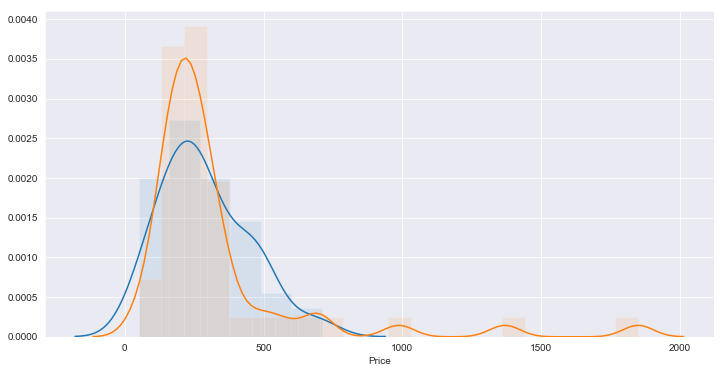

In [3]:
plt.figure(figsize=(12, 6))
for year, cur_df in df.groupby('Year'):
    print('Year: {}. Average price: {:.2f}. Median price: {:.2f}'.format(
        year, cur_df['Price'].mean(), cur_df['Price'].median()))
    sns.distplot(cur_df.Price, hist_kws={'alpha': 0.1}, label=year)

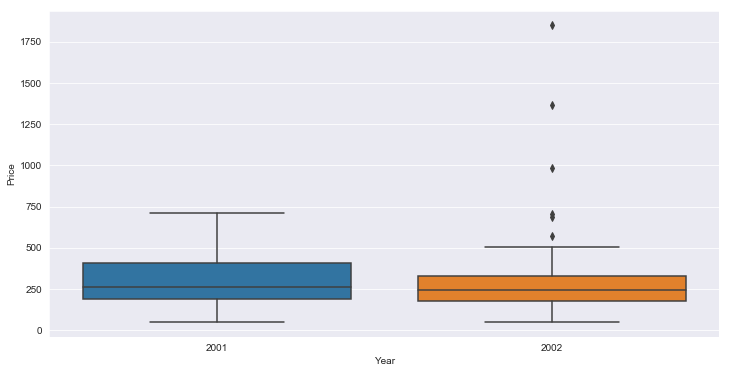

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Price', data=df)

Видно, что распределение данных далеко от нормального. Проверим это при помощи визуализации на qq-plot:

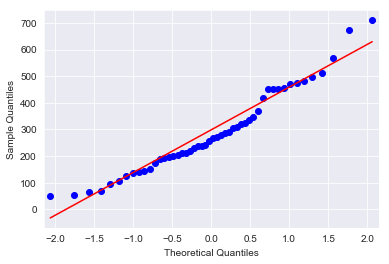

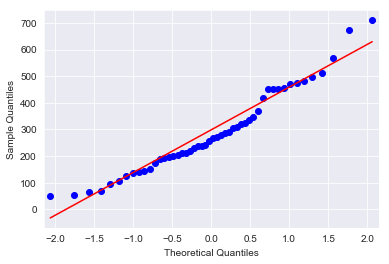

In [5]:
qqplot(df[df.Year == 2001]['Price'], line='q')

In [8]:
from scipy.stats import shapiro
_, pvalue = shapiro(df[df.Year ==  2001])
print('2001 pval: {:.4f}'.format(pvalue))
_, pvalue = shapiro(df[df.Year ==  2002])
print('2002 pval: {:.4f}'.format(pvalue))

2001 pval: 0.0000
2002 pval: 0.0000


Так как, гипотеза о нормальности данных в группах отклонена, воспользуемся непараметрическим U-критерием Манна-Уитни

In [10]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df[df.Year == 2001].Price, df[df.Year == 2002].Price)

MannwhitneyuResult(statistic=1204.5, pvalue=0.3781936337850874)

### Вывод

Средняя цена недвижимости выросла с 288.93 до 329.26 
Медиана цены упала с 260.80 до 244.93.
Статзначимого различия в выборках не наблюдается. Pvalue  = 0.37